In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
class Activation:
    """

    A class for activation functions and their derivatives

    Attributes
    ----------
    y : (len(x), ) ndarray of float
        the output from the activiation function

    y_prime : (len(x), ) ndarray of float
        the derivative the activiation function

    activation : str
        the name of the activation function specified by the user ('sigmoid' or 'tanh')

    scale_x : float
        a factor that will be multiplied with input x (default 1)

    scale_y : float
        a factor that will be multiplied with result y before returning (default 1)

    Methods
    -------
    sigmoid(x)
        evaluate the sigmoid of input x

    sigmoid_derivative()
        evaluate the derivative of the sigmoid given x

    tanh(x)
        evaluate the tanh of input x

    tanh_derivative()
        evaluate the derivative of the tanh given x

    call(x)
        a driver function to evaluate the given activiation function

    differentiate()
        a driver function to evaluate the derivative of the given activiation function

    """

    def __init__(self, activation):
        """

        Initialize all attributes of the class

        Parameters
        ---------- 
        activation : str
            the name of the activation function specified by the user ('sigmoid' or 'tanh')

        """

        self.y = []
        self.y_prime = []
        self.activation = activation
        self.scale_x = 1
        self.scale_y = 1

    def sigmoid(self, x):
        """

        Evaluate the sigmoid of input x

        y = 1 / (1 + exp(-x * scale_x))

        Parameters
        ---------- 
        x : (len(x), ) ndarray of float
            input data

        Returns
        -------
        y : (len(x), ) ndarray of float
            output from the sigmoid function

        """

        self.y = 1 / (1 + np.exp(-x * self.scale_x))

        return self.y

    def sigmoid_derivative(self):
        """

        Evaluate the derivative of the sigmoid given x

        Given y,
        y' = y * (1 - y) * scale_x

        Returns
        -------
        y_prime : (len(x), ) ndarray of float
            output from differentiating the sigmoid function

        """

        self.y_prime = self.y * (1 - self.y) * self.scale_x

        return self.y_prime

    def tanh(self, x):
        """

        Evaluate the tanh of input x

        y =  tanh(x_scale * x) * y_scale
        tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))

        Parameters
        ----------
        x : (len(x), ) ndarray of float
            input data

        Returns
        -------
        y : (len(x), ) ndarray of float
            output from the tanh function

        """

        self.y = np.tanh(x * self.scale_x) * self.scale_y

        return self.y

    def tanh_derivative(self):
        """

        Evaluate the derivative of the tanh given x

        Given y,
        y' = (scale_y - y) * (scale_y + y) * (scale_x / scale_y) 

        Returns
        -------
        y_prime : (len(x), ) ndarray of float
            output from differentiating the tanh function

        """

        self.y_prime = (self.scale_y - self.y) * \
            (self.scale_y + self.y) * (self.scale_x / self.scale_y)

        return self.y_prime

    def call(self, x):
        """

        A driver function to evaluate the given activiation function

        Parameters
        ----------
        x : (len(x), ) ndarray of float
            input data

        Returns
        -------
        y : (len(x), ) ndarray of float
            output from the given activiation function

        """

        if self.activation == 'sigmoid':

            return self.sigmoid(x)

        elif self.activation == 'tanh':

            return self.tanh(x)

    def differentiate(self):
        """

        A driver function to evaluate the derivative of the given activiation function

        Returns
        -------
        y : (len(x), ) ndarray of float
            output from the given activiation function

        """

        if self.activation == 'sigmoid':

            return self.sigmoid_derivative()

        elif self.activation == 'tanh':

            return self.tanh_derivative()

In [3]:
class Losses:
    """

    A class for loss functions and their gradients

    Attributes
    ----------
    loss : str
        the name of the loss function specified by the user ('SSE' or 'CE')

    Methods
    -------
    squared_error(y_true, y_pred)
        evaluate the squared error loss

    cross_entropy(y_true, y_pred)
        evaluate the cross entropy loss

    squared_error_grad(y_true, y_pred)
        evaluate the squared error loss gradient

    cross_entropy_grad(y_true, y_pred)
        evaluate the cross entropy loss gradient

    __call__(y_true, y_pred)
        a driver function to evaluate the given loss function

    gradient(y_true, y_pred)
        a driver function to evaluate the gradient of the given loss function

    """

    def __init__(self, loss):
        """

        Initialize the class with a user specified loss function

        Parameters
        ---------- 
        loss : str
            the name of the loss function specified by the user ('SSE' or 'CE')

        """

        self.loss = loss

    def squared_error(self, y_true, y_pred):
        """

        Evaluate the squared error loss

        loss = (y_true - y_pred) ^ 2

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        loss : (len(y), ) ndarray of float
            the squared error loss

        """

        return (y_true - y_pred) ** 2

    def cross_entropy(self, y_true, y_pred):
        """

        Evaluate the cross entropy loss

        loss = - y_true * log(y_pred) - (1 - y_true) * log(1 - y_pred)

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        loss : (len(y), ) ndarray of float
            the cross entropy loss

        """

        return - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)

    def squared_error_grad(self, y_true, y_pred):
        """

        Evaluate the squared error loss gradient

        gradient = y_true - y_pred

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        gradient : (len(y), ) ndarray of float
            the squared error loss gradient

        """

        return y_true - y_pred

    def cross_entropy_grad(self, y_true, y_pred):
        """

        Evaluate the cross entropy loss gradient

        gradient = (y_true - y_pred) / (y_pred - y_pred ^ 2)

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        gradient : (len(y), ) ndarray of float
            the cross entropy loss gradient

        """

        return (y_true - y_pred) / (y_pred - y_pred ** 2)

    def __call__(self, y_true, y_pred):
        """

        A driver function to evaluate the given loss function

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        loss : (len(y), ) ndarray of float
            evaluate the given loss function

        """

        if self.loss == 'SSE':

            return self.squared_error(y_true, y_pred)

        elif self.loss == 'CE':

            return self.cross_entropy(y_true, y_pred)

    def gradient(self, y_true, y_pred):
        """

        A driver function to evaluate the gradient of the given loss function

        Parameters
        ---------- 
        y_true : (len(y), ) ndarray of float
            true target value

        y_pred : (len(y), ) ndarray of float
            predicted y value

        Returns
        -------
        gradient : (len(y), ) ndarray of float
            evaluate the given loss function gradient

        """

        if self.loss == 'SSE':

            return self.squared_error_grad(y_true, y_pred)

        elif self.loss == 'CE':

            return self.cross_entropy_grad(y_true, y_pred)

In [4]:
class Dense:
    """

    A class containing the data structure for a dense layer, and some helper functions

    Attributes
    ----------
    n_output : int
        number of neurons in the layer

    activation : Activation
        the activation function object

    weight : (n_input + 1, n_output) 2-D ndarray of float
        weight matrix of the layer, accounting for a bias term

    prev_wght_update : (n_input + 1, n_output) 2-D ndarray of float
        record the previous weight matrix

    input : (n_input + 1, ) ndarray of float
        input to the layer with an additional bias term, [x_1, ... , x_n, 1]

    output : (n_output, ) ndarray of float
        output the layer, [y_1, ... , y_m]

    Methods
    -------
    build(n_input)
        initialize weight, prev_wght_update, and output with appropriate dimension;
        initialize weight matrix with random numbers from -1 to 1

    call(x)
        compute the output of the layer given input vector x

    """

    def __init__(self, n_output_nodes, activation):
        """

        Initialize the layer by specifying the number of neurons and the activation function

        Parameters
        ---------- 
        n_output_nodes : int
            number of neurons in the layer

        activation : str
            the activiation function used in the layer

        """

        self.n_output = n_output_nodes
        self.activation = Activation(activation)

    def build(self, n_input):
        """

        Initialize weight, prev_wght_update, and output with appropriate dimension;
        Initialize weight matrix with random numbers from -1 to 1

        Parameters
        ----------
        n_input : int
            number of input data (dimension of the features or number of neurons in the previous layer)

        """

        self.weight = np.random.uniform(
            low=-1, high=1, size=(n_input + 1, self.n_output))
        self.output = np.zeros((1, self.n_output))
        self.prev_wght_update = np.zeros((n_input + 1, self.n_output))

    def call(self, x):
        """

        Compute the output of the layer given input vector x

        y = activation_function(x @ weight)
        (n_output, ) = activation_function((n_input + 1, ) @ (n_input + 1, n_output))

        Parameters
        ----------
        x : (n_input, ) ndarray of float
            input to the layer, [x_1, ... , x_n]

        Returns
        -------
        output : (n_output, ) ndarray of float
            output the layer, [y_1, ... , y_m]

        """

        self.input = np.append(x, 1)
        v = np.matmul(self.input, self.weight)
        self.output = self.activation.call(v)

        return self.output

In [5]:
# # Testing
# np.random.seed(2020)
# layer = Dense(4, activation='sigmoid')
# layer.build(feature.shape[1])
# layer.call(feature[1])

In [6]:
class Multilayers:
    """

    A class containing the architecture for a sequential model , and some functions for training and prediction

    Attributes
    ----------
    model : (num_of_layers, ) list of Dense
        a neural network represented by a list of Dense layers

    n_layers : int
        number of layers

    y : (n_output, ) ndarray of float
        output values from the last layer

    Methods
    -------
    predict(x)
        evalute the output y by forward-propagating the input x through the network

    back_prop(target, learn_rate, loss, momentum=0)
        update the weight matrix of each layer through back-propagation

    """

    def __init__(self, x_shape, layers, input_scale=1, output_scale=1):
        """

        Initialize each layer with appropriate input dimension and activation function parameters

        Parameters
        ----------
        x_shape : int
            shape of the input vector

        layers : (num_of_layers, ) list of Dense
            a neural network represented by a list of Dense layers [Dense_1, ... , Dense_n]

        input_scale : int
            for the activation function, 
            a factor that will be multiplied with the input to the function (default 1)

        output_scale : int
            for the activation function, 
            a factor that will be multiplied with the output of the function (default 1)

        """

        self.model = layers
        self.n_layers = len(layers)

        # To initialize the FIRST layer, set its input dimension
        n_input = x_shape

        for layer in self.model:

            layer.build(n_input)

            layer.activation.x_scale = input_scale
            layer.activation.y_scale = output_scale

            # To initialize the NEXT layer,
            # set its input dimension as the output dimension of THIS layer
            n_input = layer.n_output

    def predict(self, x):
        """

        Evalute the output y by forward-propagating the input x through the network

        Parameters
        ----------
        x : (n_input, ) ndarray of float
            input to the network, [x_1, ... , x_n]

        Returns
        -------
        y : (n_output, ) ndarray of float
            output values from the last layer, [y_1, ... , y_m]

        """

        # Initialize the input_signal
        input_signal = x

        for i, layer in zip(range(self.n_layers), self.model):

            output_signal = layer.call(input_signal)

            # Propagate the output of THIS layer to the NEXT layer
            input_signal = output_signal

        self.y = output_signal

        return self.y

    def back_prop(self, target, learn_rate, loss, momentum=0):
        """

        Update the weight matrix of each layer through back-propagation

        Parameters
        ----------
        target : (n_output, ) ndarray of float
            true target values of the output, [t_1, ... , t_m]

        learn_rate : float
            the learning rate for weight updates

        loss : Losses
            the loss function object

        momentum : float
            the momentum parameter for weight updates (default 0)

        """

        i = 0

        for layer in reversed(self.model):

            activation_derivative = layer.activation.differentiate()

            if i == 0:

                # For the OUTPUT layer
                errors = loss.gradient(target, self.y)

            else:

                # For the HIDDEN layers
                errors = np.inner(deltas, prev_weight[:-1])

            deltas = errors * activation_derivative

            # Pass the current weight to the previous layer
            prev_weight = np.copy(layer.weight)

            # Update the weight matrix:
            # weight(t+1) = weight(t) + momentum * weight(t-1) + learn_rate * deltas * layer.input

            update = learn_rate * np.outer(layer.input, deltas)
            layer.weight += momentum * layer.prev_wght_update + update
            layer.prev_wght_update = update

            i += 1

In [7]:
# # Testing
# np.random.seed(2020)

# model = Multilayers(feature.shape[1],[
#     Dense(5, activation='sigmoid'),
#     Dense(3, activation='sigmoid'),
#     Dense(2, activation='sigmoid')
# ])

# loss_function = Losses('SSE')

# print('Before back prop:', model.predict(feature[0]))
# model.back_prop(target[0], learn_rate=0.1, loss=loss_function)
# print('After 1 back prop:', model.predict(feature[0]))
# model.back_prop(target[0], learn_rate=0.1, loss=loss_function)
# print('After 2 back prop:', model.predict(feature[0]))
# model.back_prop(target[0], learn_rate=0.1, loss=loss_function)
# print('After 3 back prop:', model.predict(feature[0]))

In [8]:
def train(model, feature, target, loss='SSE', learn_rate=0.1, batch_size=10, momentum=0):
    """

    Train a given neural network model with 1 epoch 
    Return the loss of each batch

    Parameters
    ----------
    model : (num_of_layers, ) list of Dense
        a neural network represented by a list of Dense layers

    feature : (sample_size, feature_dimension) 2-D ndarray of float
        feature matrix

    target : (sample_size, ) ndarray of float
        target values of each sample, [t_1, ... , t_n]

    loss : str
        the name of the loss function (default 'SSE')

    learn_rate : float
        the learning rate for weight updates (default 0.1)

    batch_size : int
        the size of each batch (default 10)

    momentum : float
        the momentum parameter for weight updates (default 0)

    Returns
    -------
    history : (n_batch, ) list of float
        a list of average losses for each batch [avg_loss_in_batch_1, ... , avg_loss_in_batch_m]

    """

    epoch_size = len(feature)
    n_batch = int(np.ceil(epoch_size / batch_size))
    loss_function = Losses(loss)

    # Randomize the order in which the samples are presented to the model
    order = np.random.choice(range(epoch_size), size=epoch_size, replace=False)

    i = 0
    history = []

    for batch_i in range(n_batch):

        if batch_i == n_batch - 1 and epoch_size % batch_size != 0:
            this_batch_size = epoch_size % batch_size  # The LAST batch may be smaller
        else:
            this_batch_size = batch_size

        batch_count = 0
        batch_error = 0

        while batch_count < this_batch_size:

            pos = order[i]  # Index of the sample

            y_true = target[pos]
            y_pred = model.predict(feature[pos])
            # Accumulate the loss in this batch
            batch_error += np.mean(loss_function(y_true, y_pred))

            # Train the model by back-propagation for each sample
            model.back_prop(y_true, learn_rate, loss_function, momentum)

            batch_count += 1
            i += 1

        mean_batch_error = batch_error / this_batch_size
        history.append(mean_batch_error)

    return history

In [9]:
def one_hot_encoding(label_vector):
    """

    Helper function for cross-entropy loss calculation;
    Translate class labels into a binary representation 
    
    For example:
        [0, 2, 1] will be translated into [[0, 0], [1, 0], [0, 1]].T

    Parameters
    ----------
    label_vector : (vector_size, ) ndarray or list
        a vector of class labels
        
    Returns
    -------
    binary_rep : (max_bit_num, vector_size) 2-D ndarray of bits (0 or 1)
        binary representations of the input labels

    """
    
    binary_rep = ['{0:b}'.format(int(label)) for label in label_vector] # Binary representation in string
    max_bit_num = max([len(binary_label) for binary_label in binary_rep]) # Max number of bits needed
    
    # From string to list of bits
    binary_rep = [binary_label.zfill(max_bit_num) for binary_label in binary_rep]
    binary_rep = [[int(bit) for bit in binary_label] for binary_label in binary_rep]
    binary_rep = np.array(binary_rep)
    
    return binary_rep

In [10]:
file_num = 3

# Training data file paths
feature_file = f'train_data{file_num}.txt'
target_file = f'train_target{file_num}.txt'

# User specified arguments
layer_num = 3
units = [5,3,1]
activation = 'tanh' #'tanh' 'sigmoid'
loss = 'SSE' #'CE' 'SSE'
learn_rate = 0.05
max_epochs = 5E3
batch_size = 20
tolerance = 1E-4
output_file = f'output{file_num}.txt'

# Model parameters for future use
momentum = 0 #0.1
output_scale = 4

# Load feature matrix and target vector
feature = np.genfromtxt(feature_file, delimiter=' ')
target = np.genfromtxt(target_file, delimiter=' ')
target = target[:, np.newaxis]

if loss == 'CE':
    target = one_hot_encoding(target)

# Check the dimension of the training feature and target
print(feature.shape)
print(target.shape)

(200, 5)
(200, 1)


In [11]:
# Parameters for python outputs
periodic_output = 2E2
plt.rcParams['figure.figsize'] = (16,6)

0 0.04803891170932876
--- 2.955956s seconds ---
117 9.27460806626017e-05


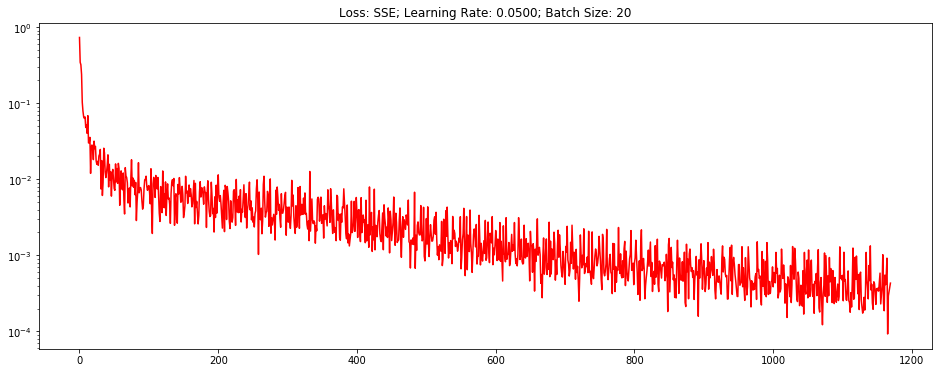

In [12]:
# Construct the neural network
model = Multilayers(feature.shape[1], 
                    [Dense(n_output_nodes, activation) for n_output_nodes in units], 
                    output_scale=output_scale)

# Initialize training parameters
min_batch_error = tolerance + 1
error = []
history = []
i = 0

start_time = time.time()

while min_batch_error > tolerance and i < max_epochs:
    
    # Train the model for 1 epoch
    error = train(model, feature, target, loss, learn_rate, batch_size, momentum=momentum)
    
    # Log the error
    min_batch_error = min(error)
    history = np.append(history, error)
    
    if i % periodic_output == 0:
        print(i, min_batch_error)

    i += 1

# Save the improvement in loss through time to a output file
np.savetxt(output_file, history, delimiter=' ')

print(f"--- {(time.time() - start_time):.6f}s seconds ---")
print(i, min_batch_error)

# Graph the loss through time
plt.title(f'Loss: {loss}; Learning Rate: {learn_rate:.4f}; Batch Size: {batch_size}')
plt.plot(history, color='red')
plt.plot([0, len(history)], [0, 0])
plt.yscale('log')
plt.show()

In [13]:
# # Testing
# def lookinside(model):
#     print('------Weights------')
#     print()
#     for layer in model.model:
#         print(layer.weight)
#         print()

#     print()
#     print('------Outputs------')
#     print()
#     for layer in model.model:
#         print(layer.output)
#         print()

# transform = Activation(activation)
# transform.scale_y = 3
# transform.scale_x = 1
# x = np.arange(-3,3,0.001)
# y = transform.call(x)
# plt.plot(x,y)